<a href="https://colab.research.google.com/github/anix-lynch/Python_visualization/blob/main/Copy_of_Python_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Flowmap**

<ipython-input-3-9073a19546d8>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


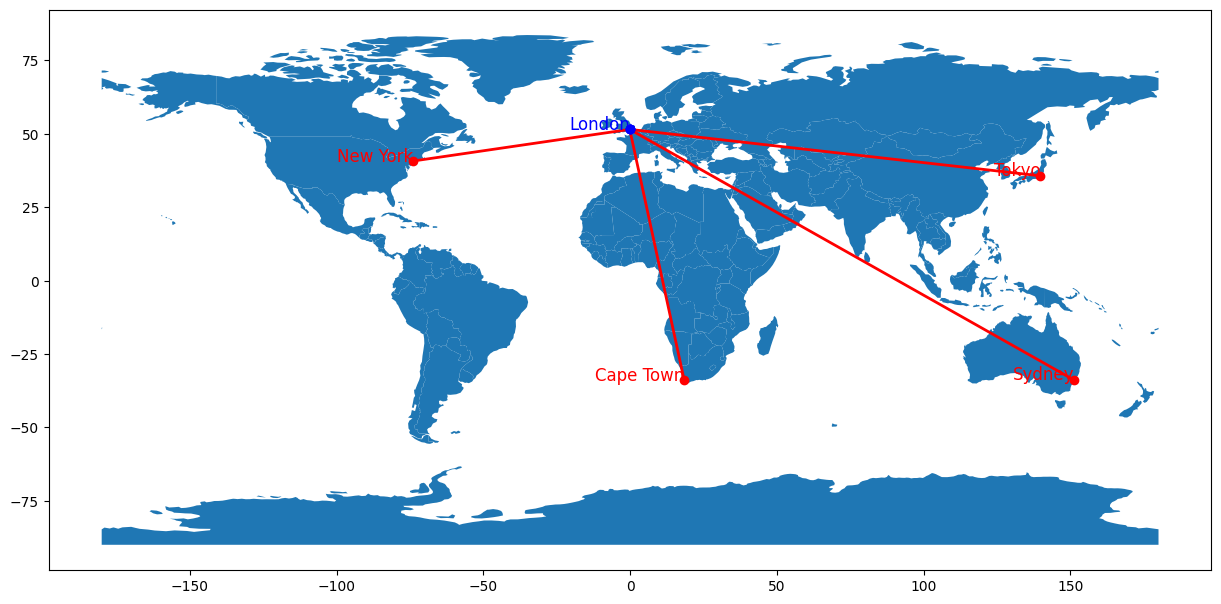

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Create dummy data for flights from London to various destinations
data = {
    'origin': ['London', 'London', 'London', 'London'],
    'destination': ['New York', 'Tokyo', 'Sydney', 'Cape Town'],
    'latitude_origin': [51.5074, 51.5074, 51.5074, 51.5074],
    'longitude_origin': [-0.1278, -0.1278, -0.1278, -0.1278],
    'latitude_dest': [40.7128, 35.6895, -33.8688, -33.9249],
    'longitude_dest': [-74.0060, 139.6917, 151.2093, 18.4241],
}

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(data)

# Create a base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))

# Plot flow lines
for i, row in gdf.iterrows():
    origin = Point(row['longitude_origin'], row['latitude_origin'])
    dest = Point(row['longitude_dest'], row['latitude_dest'])
    line = LineString([origin, dest])
    gpd.GeoSeries([line]).plot(ax=ax, color='red', linewidth=2)

# Mark the origin city (London) and destination cities
for i, row in gdf.iterrows():
    plt.plot(row['longitude_origin'], row['latitude_origin'], 'bo')  # blue dot for origin
    plt.plot(row['longitude_dest'], row['latitude_dest'], 'ro')      # red dot for destinations

# Add labels
plt.text(-0.1278, 51.5074, 'London', fontsize=12, ha='right', color='blue')
for i, row in gdf.iterrows():
    plt.text(row['longitude_dest'], row['latitude_dest'], row['destination'], fontsize=12, ha='right', color='red')

plt.show()



# **2. Connection map**

<ipython-input-12-0dab4aee4cec>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


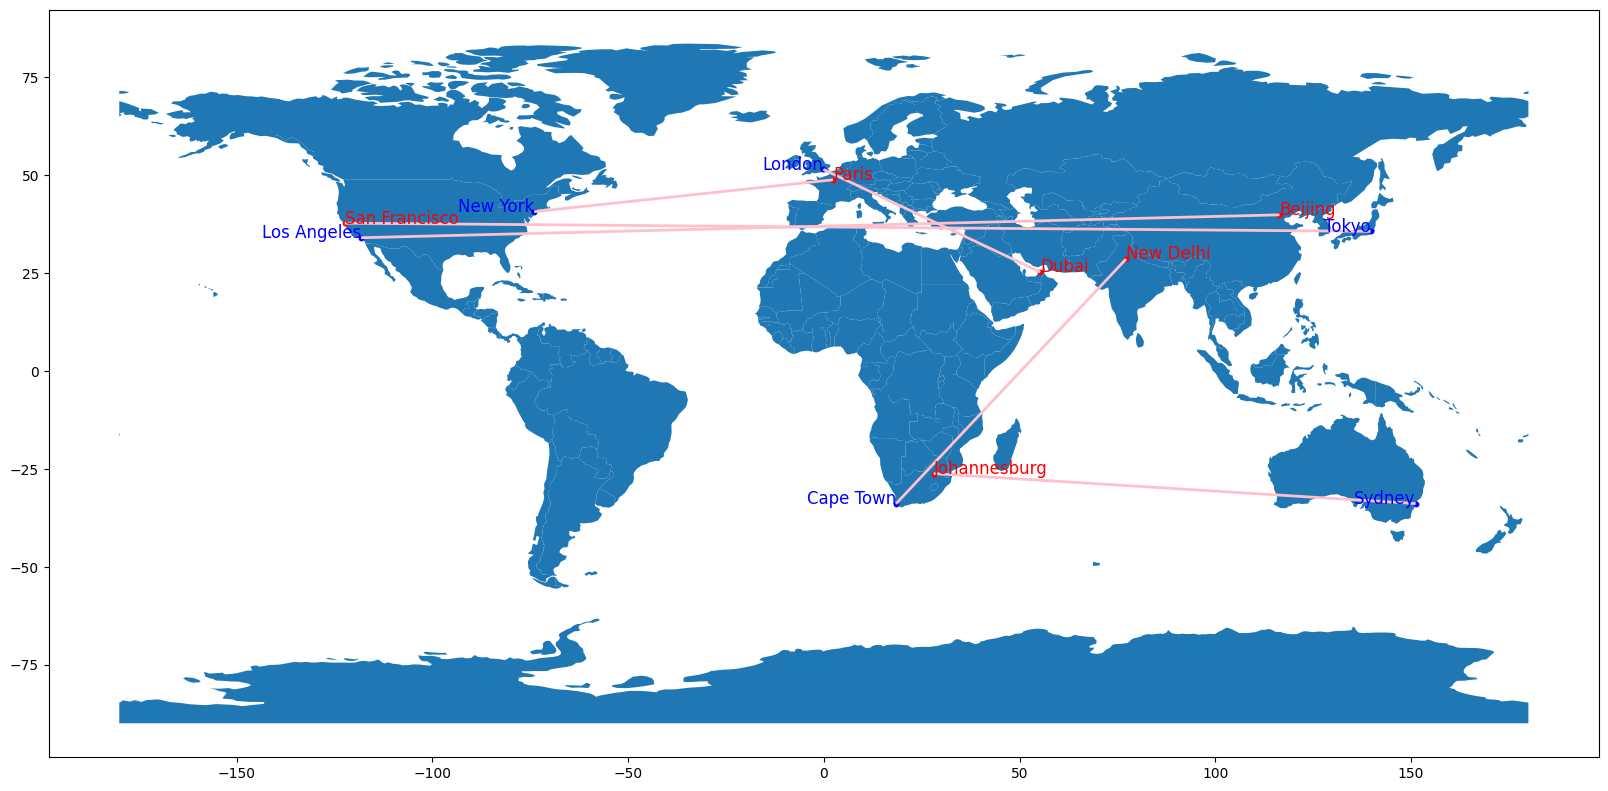

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Create dummy data for flight connections
data = {
    'origin': ['New York', 'Los Angeles', 'London', 'Tokyo', 'Sydney', 'Cape Town'],
    'destination': ['Paris', 'Beijing', 'Dubai', 'San Francisco', 'Johannesburg', 'New Delhi'],
    'latitude_origin': [40.7128, 34.0522, 51.5074, 35.6895, -33.8688, -33.9249],
    'longitude_origin': [-74.0060, -118.2437, -0.1278, 139.6917, 151.2093, 18.4241],
    'latitude_dest': [48.8566, 39.9042, 25.276987, 37.7749, -26.2041, 28.6139],
    'longitude_dest': [2.3522, 116.4074, 55.296249, -122.4194, 28.0473, 77.2090],
}

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(data)

# Create a base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20, 12))

# Plot flow lines
for i, row in gdf.iterrows():
    origin = Point(row['longitude_origin'], row['latitude_origin'])
    dest = Point(row['longitude_dest'], row['latitude_dest'])
    line = LineString([origin, dest])
    gpd.GeoSeries([line]).plot(ax=ax, color='pink', linewidth=2)

# Plot origin and destination points
gdf['geometry_origin'] = gdf.apply(lambda row: Point(row['longitude_origin'], row['latitude_origin']), axis=1)
gdf['geometry_dest'] = gdf.apply(lambda row: Point(row['longitude_dest'], row['latitude_dest']), axis=1)

gdf.set_geometry('geometry_origin').plot(ax=ax, color='blue', markersize=10)
gdf.set_geometry('geometry_dest').plot(ax=ax, color='red', markersize=10)

# Add labels for each point
for x, y, label in zip(data['longitude_origin'], data['latitude_origin'], data['origin']):
    plt.text(x, y, label, fontsize=12, ha='right', color='blue')

for x, y, label in zip(data['longitude_dest'], data['latitude_dest'], data['destination']):
    plt.text(x, y, label, fontsize=12, ha='left', color='red')

plt.show()


# **3. Bubble Map**

In [ ]:
import pandas as pd
import plotly.express as px

# Create dummy data for some metric (e.g., population, sales, etc.) for each state
data = {
    'state': ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania',
              'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan'],
    'metric': [3951, 2900, 2148, 1945, 1280,
               1267, 1169, 1062, 1049, 999],  # Example metric data in thousands
    'latitude': [36.7783, 31.9686, 27.9944, 40.7128, 41.2033,
                 40.6331, 40.4173, 32.1656, 35.7596, 44.3148],
    'longitude': [-119.4179, -99.9018, -81.7603, -74.0060, -77.1945,
                  -89.3985, -82.9071, -82.9001, -79.0193, -85.6024],
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a bubble map using Plotly
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     size='metric',
                     hover_name='state',
                     size_max=50,
                     projection='albers usa',
                     title='Bubble Map of Example Metric in Major US States',
                     color='metric',
                     color_continuous_scale=px.colors.sequential.Viridis)

# Adjust the map appearance
fig.update_geos(
    scope="usa",
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="lightblue"
)

# Adjust the layout
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the map
fig.show()






# **4. Choropleth Map**

In [ ]:

import plotly.express as px
import pandas as pd

# Create dummy data for some metric (e.g., population percentage) for each state
data = {
    'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
              'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
              'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'value': [20, 10, 30, 25, 40, 35, 15, 20, 30, 25,
              10, 15, 25, 20, 30, 35, 25, 30, 15, 20,
              35, 25, 30, 20, 35, 15, 20, 30, 25, 20,
              15, 35, 25, 10, 30, 25, 20, 35, 15, 20,
              25, 30, 40, 15, 20, 35, 30, 20, 25, 15]
}

# Create DataFrame
df = pd.DataFrame(data)

# Add the state code to the DataFrame for mapping
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

df['state_code'] = df['state'].map(state_abbrev)

# Create a choropleth map using Plotly
fig = px.choropleth(df,
                    locations='state_code',
                    locationmode="USA-states",
                    color='value',
                    hover_name='state',
                    color_continuous_scale='YlOrRd',
                    scope="usa",
                    title='Choropleth Map of Example Metric in US States')

# Adjust the layout
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the map
fig.show()


# **5. Dot Map**

In [ ]:
import plotly.express as px
import pandas as pd

# Create dummy data for locations in Australia
data = {
    'latitude': [-31.9505, -34.9285, -27.4698, -33.8688, -37.8136,
                 -32.9283, -27.4710, -34.5833, -27.5966, -34.6037,
                 -31.9505, -34.9285, -27.4698, -33.8688, -37.8136,
                 -32.9283, -27.4710, -34.5833, -27.5966, -34.6037],
    'longitude': [115.8605, 138.6007, 153.0251, 151.2093, 144.9631,
                  151.2093, 153.0251, 138.6007, 153.0251, 138.6007,
                  115.8605, 138.6007, 153.0251, 151.2093, 144.9631,
                  151.2093, 153.0251, 138.6007, 153.0251, 138.6007],
    'location': ['Perth', 'Adelaide', 'Brisbane', 'Sydney', 'Melbourne',
                 'Newcastle', 'Gold Coast', 'Adelaide', 'Sunshine Coast', 'Darwin',
                 'Perth', 'Adelaide', 'Brisbane', 'Sydney', 'Melbourne',
                 'Newcastle', 'Gold Coast', 'Adelaide', 'Sunshine Coast', 'Darwin'],
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a dot map using Plotly Express
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     hover_name='location',
                     projection='mercator',  # Use mercator projection
                     title='Dot Map of Locations in Australia')

# Adjust the map appearance
fig.update_geos(
    showcountries=True, countrycolor="Black",
    showcoastlines=True, coastlinecolor="Gray",
    showland=True, landcolor="lightgray",
    showocean=True, oceancolor="lightblue",
    resolution=50,
    lataxis_range=[-45, -10],  # Focus latitude range to Australia
    lonaxis_range=[110, 155]   # Focus longitude range to Australia
)

# Adjust the layout
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the map
fig.show()



# **6. Word Cloud**

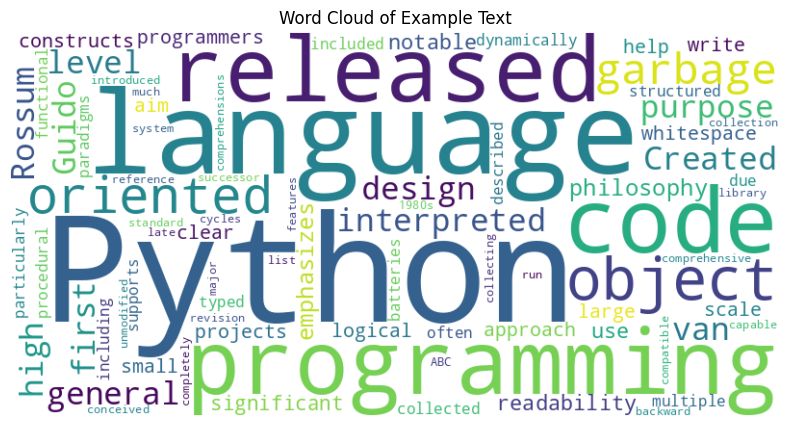

In [ ]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create dummy data for word cloud
text = """
Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.
Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library.
Python was conceived in the late 1980s as a successor to the ABC language. Python 2.0, released in 2000, introduced features like list comprehensions and a garbage collection system capable of collecting reference cycles. Python 3.0, released in 2008, was a major revision of the language that is not completely backward-compatible, and much Python 2 code does not run unmodified on Python 3.
"""

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Example Text')
plt.show()


# **7. Tree Map**

In [ ]:


import plotly.express as px
import pandas as pd

# Create dummy data for treemap
data = {
    'Category': ['Birds', 'Birds', 'Birds', 'Birds', 'Birds', 'Birds', 'Birds',
                 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals', 'Mammals',
                 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
                 'Reptiles', 'Reptiles', 'Reptiles', 'Reptiles', 'Reptiles'],
    'Subcategory': ['Zebra Finches', 'Canaries', 'Cockatiels', 'Budgerigars', 'Lovebirds', 'Parrots', 'Cockatoos',
                    'Dogs', 'Cats', 'Rabbits', 'Mice', 'Rats', 'Guinea Pigs',
                    'Goldfish', 'Coy Carp', 'Angelfish', 'Catfish', 'Cichlid', 'Molly', 'Tetra', 'Guppy', 'Loach',
                    'Geckos', 'Snakes', 'Chameleon', 'Bearded Dragon', 'Monitor'],
    'Count': [50, 20, 30, 40, 25, 10, 15,
              100, 60, 40, 30, 20, 10,
              80, 40, 60, 50, 30, 20, 30, 10, 15,
              25, 15, 10, 20, 5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a treemap using Plotly Express
fig = px.treemap(df,
                 path=['Category', 'Subcategory'],
                 values='Count',
                 title='Pet Shop Inventory Treemap')

# Adjust the layout
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the treemap
fig.show()


# **8. Sunburst Diagram**

In [ ]:
import plotly.express as px
import pandas as pd

# Create dummy data for sunburst diagram
data = {
    'labels': ["Root Node", "Node A", "Node B", "Leaf A1", "Leaf A2", "Leaf B1", "Leaf B2"],
    'parents': ["", "Root Node", "Root Node", "Node A", "Node A", "Node B", "Node B"],
    'values': [10, 5, 5, 3, 2, 3, 2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a sunburst diagram using Plotly Express
fig = px.sunburst(df,
                  names='labels',
                  parents='parents',
                  values='values',
                  title='Sunburst Diagram Example',
                  branchvalues='total')

# Adjust the layout
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the sunburst diagram
fig.show()



# **9. Pie chart**

In [ ]:
# If you don't have plotly installed, you can install it using the following command:
# !pip install plotly

import plotly.express as px
import pandas as pd

# Create dummy data for pie chart
data = {
    'Category': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [40, 30, 20, 10]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a pie chart using Plotly Express
fig = px.pie(df,
             names='Category',
             values='Values',
             title='Pie Chart with Percentages',
             hole=0.3)

# Add percentages to the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Adjust the layout
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the pie chart
fig.show()


# **10. Pictograph**

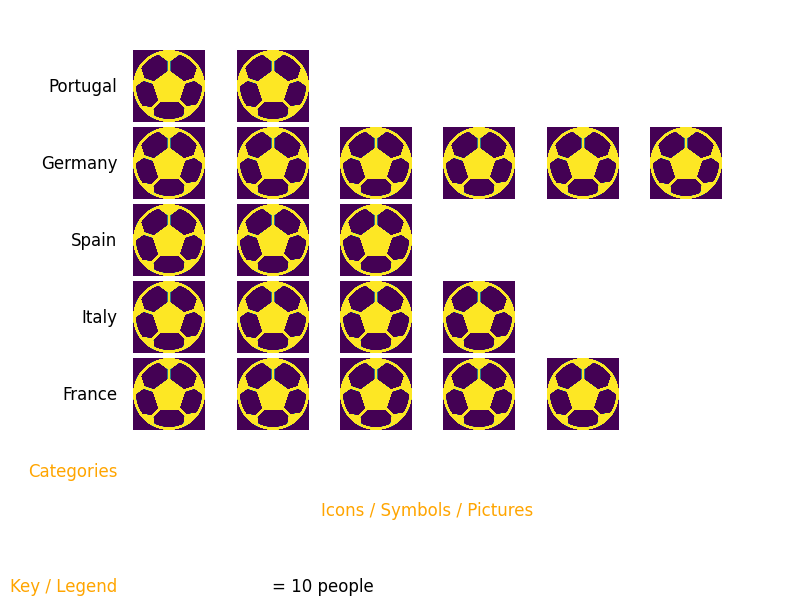

In [ ]:



import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create dummy data for the pictograph
data = {
    'Country': ['France', 'Italy', 'Spain', 'Germany', 'Portugal'],
    'Count': [5, 4, 3, 6, 2]  # Each unit represents 10 people
}

# Path to the football icon image
icon_path = '/content/football-game_77305.png'

# Load the icon image
icon = Image.open(icon_path)
icon_width, icon_height = icon.size

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 6)
ax.set_ylim(0, len(data['Country']) + 1)
ax.axis('off')

# Function to add images to the plot
def add_images(ax, xy, image, count):
    x, y = xy
    for i in range(count):
        offset_image = OffsetImage(image, zoom=0.1)
        ab = AnnotationBbox(offset_image, (x + i, y), frameon=False)
        ax.add_artist(ab)

# Plot the data
for i, (country, count) in enumerate(zip(data['Country'], data['Count'])):
    ax.text(-0.5, i + 1, country, va='center', ha='right', fontsize=12)
    add_images(ax, (0, i + 1), icon, count)

# Add legend
ax.text(-0.5, 0, 'Categories', va='center', ha='right', fontsize=12, color='orange')
ax.text(2.5, -0.5, 'Icons / Symbols / Pictures', va='center', ha='center', fontsize=12, color='orange')
ax.text(-0.5, -1.5, 'Key / Legend', va='center', ha='right', fontsize=12, color='orange')
add_images(ax, (0, -1.5), icon, 1)
ax.text(1, -1.5, '= 10 people', va='center', ha='left', fontsize=12)

plt.show()


# **11. Donut Chart**

In [ ]:


import plotly.express as px
import pandas as pd

# Create dummy data for donut chart
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [12, 20, 28, 40]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a donut chart using Plotly Express
fig = px.pie(df,
             names='Category',
             values='Values',
             title='Donut Chart Example',
             hole=0.4)  # This parameter creates the hole in the middle

# Add percentages to the donut chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Adjust the layout
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the donut chart
fig.show()


# **12. Gantt Chart**

In [ ]:
import plotly.express as px
import pandas as pd

# Create dummy data for Gantt chart
data = {
    'Task': ['Task A', 'Task B', 'Task C', 'Task D'],
    'Start': ['2023-07-01', '2023-07-05', '2023-07-10', '2023-07-15'],
    'Finish': ['2023-07-10', '2023-07-12', '2023-07-20', '2023-07-25'],
    'Resource': ['Team 1', 'Team 2', 'Team 1', 'Team 2'],
    'Department': ['Department X', 'Department Y', 'Department X', 'Department Y']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a Gantt chart using Plotly Express
fig = px.timeline(df, x_start='Start', x_end='Finish', y='Task', color='Resource',
                  title='Gantt Chart', hover_data=['Start', 'Finish', 'Resource', 'Department'])

# Update layout for better visualization
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(
    title=dict(x=0.5, xanchor='center'),
    xaxis_title='Date',
    yaxis_title='Task',
    margin=dict(l=20, r=20, t=50, b=20)
)

# Show the Gantt chart
fig.show()

# **13. Venn Diagram**

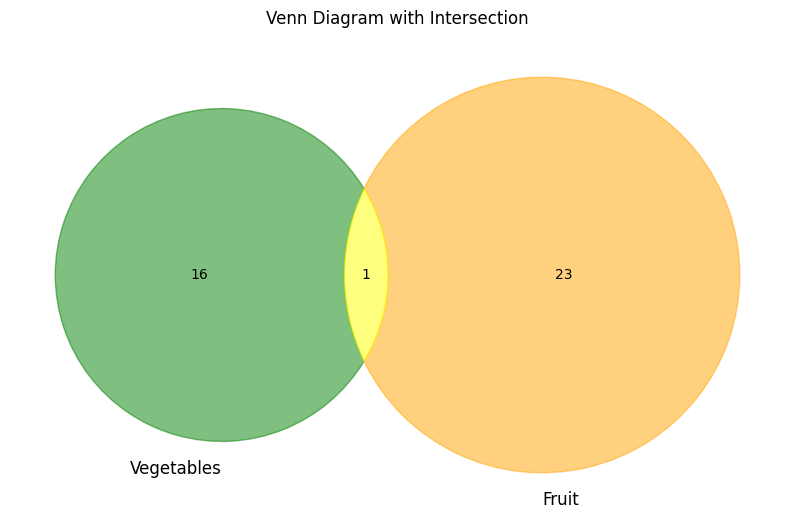

In [ ]:


import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create data for the Venn diagram
set1 = {"Lettuce", "Potato", "Carrot", "Artichoke", "Cauliflower", "Leek", "Lentils", "Onion",
        "Asparagus", "Watercress", "Celery", "Broccoli", "Spinach", "Cabbage", "Chives", "Rocket", "Tomato"}

set2 = {"Olive", "Avocado", "Tomato", "Cucumber", "Pumpkin", "Pepper", "Blackberry", "Raspberry",
        "Pineapple", "Blueberry", "Cherry", "Apple", "Plum", "Apricot", "Banana", "Pear", "Strawberry",
        "Grapefruit", "Orange", "Grapes", "Lemon", "Kiwi", "Fig", "Lime"}

# Plot the Venn diagram
fig, ax = plt.subplots(figsize=(10, 7))
venn = venn2([set1, set2], ('Vegetables', 'Fruit'))



# Set colors
venn.get_patch_by_id('10').set_color('green')
venn.get_patch_by_id('01').set_color('orange')
venn.get_patch_by_id('11').set_color('yellow')

# Set transparency
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_alpha(0.5)

# Add title
plt.title('Venn Diagram with Intersection')

plt.show()




# **14. Mindmap**

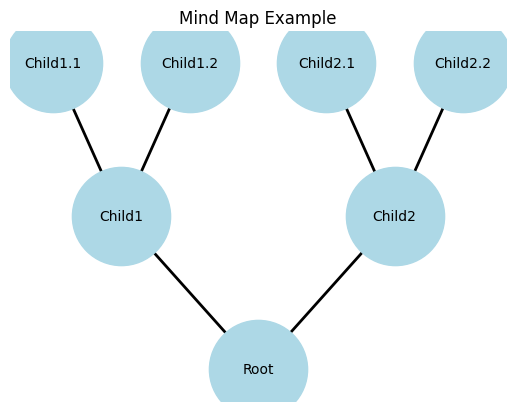

In [ ]:


import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes with a dictionary of attributes
nodes = [
    ("Root", {"pos": (0, 0)}),
    ("Child1", {"pos": (-1, 1)}),
    ("Child2", {"pos": (1, 1)}),
    ("Child1.1", {"pos": (-1.5, 2)}),
    ("Child1.2", {"pos": (-0.5, 2)}),
    ("Child2.1", {"pos": (0.5, 2)}),
    ("Child2.2", {"pos": (1.5, 2)})
]

# Add edges between the nodes
edges = [
    ("Root", "Child1"),
    ("Root", "Child2"),
    ("Child1", "Child1.1"),
    ("Child1", "Child1.2"),
    ("Child2", "Child2.1"),
    ("Child2", "Child2.2")
]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Extract positions from the node attributes
pos = nx.get_node_attributes(G, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='lightblue')

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2)

# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Remove axis
plt.axis('off')

# Add title
plt.title('Mind Map Example')

# Show the mind map
plt.show()



# **15. Orgchart**

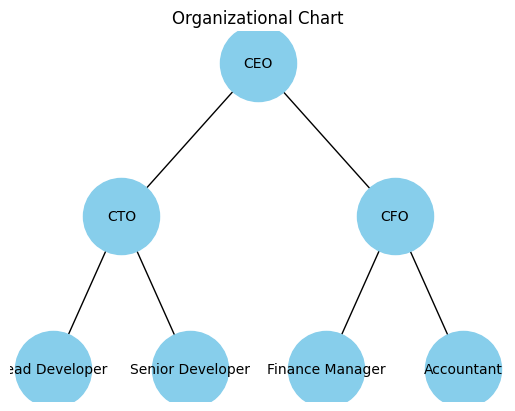

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add nodes with a dictionary of attributes
nodes = [
    ("CEO", {"pos": (0, 3)}),
    ("CTO", {"pos": (-1, 2)}),
    ("CFO", {"pos": (1, 2)}),
    ("Lead Developer", {"pos": (-1.5, 1)}),
    ("Senior Developer", {"pos": (-0.5, 1)}),
    ("Finance Manager", {"pos": (0.5, 1)}),
    ("Accountant", {"pos": (1.5, 1)})
]

# Add edges between the nodes
edges = [
    ("CEO", "CTO"),
    ("CEO", "CFO"),
    ("CTO", "Lead Developer"),
    ("CTO", "Senior Developer"),
    ("CFO", "Finance Manager"),
    ("CFO", "Accountant")
]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Extract positions from the node attributes
pos = nx.get_node_attributes(G, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=20)

# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Remove axis
plt.axis('off')

# Add title
plt.title('Organizational Chart')

# Show the org chart
plt.show()


# **18. Stacked bubble**

In [ ]:


import plotly.express as px
import pandas as pd
import numpy as np

# Create a DataFrame with example data
data = {
    'Category': ['Phones', 'Tables', 'Binders', 'Chairs', 'Bookcases', 'Storage', 'Accessories',
                 'Appliances', 'Paper', 'Machines', 'Art', 'Copiers'],
    'Size': [40, 30, 20, 60, 25, 50, 35, 20, 15, 45, 10, 25]
}

df = pd.DataFrame(data)

# Create x and y positions for the bubbles
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
df['x'] = np.cos(angles)
df['y'] = np.sin(angles)

# Create a bubble chart using plotly express
fig = px.scatter(df, x='x', y='y', size='Size', color='Category',
                 hover_name='Category', size_max=60)

# Update layout to make the bubbles more dispersed
fig.update_layout(
    title='Stacked Bubble Chart',
    xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
    showlegend=False
)

# Show the chart
fig.show()



# **19. Waterfall**

In [ ]:

import plotly.graph_objects as go

# Create data for the waterfall chart
data = {
    'Stage': ['Shipped', 'Complete', 'Processing', 'Cancelled', 'Returned', 'Total'],
    'Values': [58577.76, 26784.87, 13496.73, -7709.96, -8349.79, 82799.61]
}

# Define the connector
connector = dict(line=dict(color="rgb(63, 63, 63)"))

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative", "total"],
    x = data['Stage'],
    textposition = "outside",
    text = [f"${v:,.2f}" for v in data['Values']],
    y = data['Values'],
    connector = connector
))

# Update layout
fig.update_layout(
    title = "Waterfall Chart",
    showlegend = False,
    xaxis_title = "Status",
    yaxis_title = "Total Sales $",
    autosize = True,
    waterfallgroupgap = 0.5
)

# Show the chart
fig.show()


# **20. Funnel Chart**

In [ ]:


import plotly.graph_objects as go

# Create data for the funnel chart
stages = ['Product', 'Cart', 'Purchase', 'Register', 'Cancel']
counts = [699053, 443526, 312932, 90866, 3690]
percentages = ['100%', '63%', '45%', '13%', '1%']

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y = stages,
    x = counts,
    textinfo = "value+percent initial"
))

# Update layout
fig.update_layout(
    title='Purchase Events',
    xaxis_title='Count',
    yaxis_title='Stage',
    showlegend=False
)

# Show the chart
fig.show()

